#TRABAJO PRÁCTICO Nro. 1 DEEP LEARNING 
RED NEURONAL EN NUMPY PARA UN XOR

By Anahi Bazet

##Cálculos 
En el siguiente pdf se encuentran los cálculos solo de la primera iteración para la entrada X=(0,0). Se realizan para chequear que lo desarrollado en el algoritmo esté correcto.

[Red Neuronal XOR](https://drive.google.com/file/d/1JHihujiBDJZlPeZTMZI7xmyEoBORqLN3/view)

##Código

In [1]:
#Se importan las librerías.
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Se crea el array con los datos de entrada.
INPUT_X = np.array([[0,0],[0,1],[1,0],[1,1]])
print ("INPUT_X:\n", INPUT_X)

INPUT_X:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]


In [3]:
#Se crea el array con los datos de salida (y).
EXPECTED_RESULT = np.array([[0,1,1,0]]).T # Transpuesta en formato columna.
print ("EXPECTED_RESULT:\n", EXPECTED_RESULT)

EXPECTED_RESULT:
 [[0]
 [1]
 [1]
 [0]]


In [4]:
#Se define una clase activación con un método que contiene la función sigmoide.
class activation:
  def sigmoid(self,x):
      return 1/(1+np.exp(-x))

###Corrida 1: con el hiperparámetro definido en clase alfa=0.01 y el hiperparámetro n_epochs=2000

Se inicializan W y b con una semilla y se utiliza el hiperparámetro alfa=0.01 solicitado en clase, pero se modifica epochs para poder comparar con las corridas siguientes.

In [5]:
#Se definen los parámetros W y b de las dos capas con su semilla respectiva para lograr reproducibilidad.
np.random.seed(0)
WL1=np.random.uniform(0,1,(2,2))
WL1

array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318]])

In [6]:
np.random.seed(1)
bL1=np.random.uniform(0,1,(1,2)).T
bL1

array([[0.417022  ],
       [0.72032449]])

In [7]:
np.random.seed(2)
WL2=np.random.uniform(0,1,(1,2))
WL2

array([[0.4359949 , 0.02592623]])

In [8]:
np.random.seed(3)
bL2=np.random.uniform(0,1,(1,1)).T
bL2

array([[0.5507979]])

In [9]:
#Se definen los hiperparámetros:
n_epochs=2000
alfa=0.01
#Se inicializan objetos y variables:
MSE = []
activ=activation()

In [10]:
#Se desarrolla el algoritmo principal según el pseudocódigo solicitado.
for epochs in range(n_epochs):
  MSE_X=0
  for i,X in enumerate(INPUT_X):
      #PASO 1: FORWARD
      #print ("X",X)
      #print ("i",i)
      X=X.reshape(2,1)
      #print ("X (reshape)\n",X)
      l1 = np.dot(WL1, X)+bL1
      #print ("l1\n",l1)
      act1 = activ.sigmoid(l1)
      #print ("act1\n",act1)
      l2 = np.dot(WL2, act1)+bL2
      #print ("l2\n",l2)
      y_hat = l2
      if n_epochs==epochs+1:
        print ("y_hat:",y_hat[0])

      #PASO 2: ERROR
      error=EXPECTED_RESULT[i]-y_hat
      if n_epochs==epochs+1:
        print ("Expected_Result:",EXPECTED_RESULT[i])
      #print ("error: ",error)

      #PASO 3: BACKWARD
      #3 parámetros de la capa 2:
      DWL2=2*(EXPECTED_RESULT[i]-y_hat)*(-1)*act1
      DbL2=2*(EXPECTED_RESULT[i]-y_hat)*(-1)
      #print ("DWL2:\n",DWL2)
      #print ("DbL2: ",DbL2)
      #6 parámetros de la capa 1:
      DW11L1=2*(EXPECTED_RESULT[i]-y_hat)*(-1)*WL2[0,0]*act1[0,0]*(1-act1[0,0])*X[0,0]
      DW12L1=2*(EXPECTED_RESULT[i]-y_hat)*(-1)*WL2[0,0]*act1[0,0]*(1-act1[0,0])*X[1,0]
      Db1L1=2*(EXPECTED_RESULT[i]-y_hat)*(-1)*WL2[0,0]*act1[0,0]*(1-act1[0,0])
      DW21L1=2*(EXPECTED_RESULT[i]-y_hat)*(-1)*WL2[0,1]*act1[1,0]*(1-act1[1,0])*X[0,0]
      DW22L1=2*(EXPECTED_RESULT[i]-y_hat)*(-1)*WL2[0,1]*act1[1,0]*(1-act1[1,0])*X[1,0]
      Db2L1=2*(EXPECTED_RESULT[i]-y_hat)*(-1)*WL2[0,1]*act1[1,0]*(1-act1[1,0])
      #print ("DW11L1: ",DW11L1)
      #print ("DW12L1: ",DW12L1)
      #print ("Db1L1: ",Db1L1)
      #print ("DW21L1: ",DW21L1)
      #print ("DW22L1: ",DW22L1)
      #print ("Db2L1: ",Db2L1)
      DWL1= np.array([[DW11L1[0,0],DW12L1[0,0]],[DW21L1[0,0],DW22L1[0,0]]])
      #print ("DWL1: ",DWL1)
      DbL1= np.array([[Db1L1[0,0]],[Db2L1[0,0]]])
      #print ("DbL1: ",DbL1)

      #PASO 4: Actualización de parámetros:
      #Capa 2:
      WL2=WL2-alfa*DWL2.T
      bL2=bL2-alfa*DbL2
      #print ("WL2: ",WL2)
      #print ("bL2: ",bL2)
      #Capa 1:
      WL1=WL1-alfa*DWL1
      bL1=bL1-alfa*DbL1
      #print ("WL1: ",WL1)
      #print ("bL1: ",bL1)

      #PASO 5: Calcular el MSE
      MSE_X=MSE_X+error[0,0]**2
      #print ("MSE_X",MSE_X)

  MSE.append(MSE_X/4)  
  print ("Epochs:",epochs,"- Error:", MSE_X/4)

Epochs: 0 - Error: 0.39287894209146107
Epochs: 1 - Error: 0.35304302403473625
Epochs: 2 - Error: 0.32509690884273146
Epochs: 3 - Error: 0.305490833736277
Epochs: 4 - Error: 0.29173719719331176
Epochs: 5 - Error: 0.28209131446910923
Epochs: 6 - Error: 0.27532884779632144
Epochs: 7 - Error: 0.2705902863401156
Epochs: 8 - Error: 0.2672720958255786
Epochs: 9 - Error: 0.2649504389780267
Epochs: 10 - Error: 0.26332767222985015
Epochs: 11 - Error: 0.2621947929981423
Epochs: 12 - Error: 0.26140506963873844
Epochs: 13 - Error: 0.2608555177700413
Epochs: 14 - Error: 0.26047388535010985
Epochs: 15 - Error: 0.2602095070284324
Epochs: 16 - Error: 0.2600268770870856
Epochs: 17 - Error: 0.25990113290823863
Epochs: 18 - Error: 0.25981488127892605
Epochs: 19 - Error: 0.2597559685953349
Epochs: 20 - Error: 0.2597159145577019
Epochs: 21 - Error: 0.25968881223139884
Epochs: 22 - Error: 0.25967055588612564
Epochs: 23 - Error: 0.2596582991756559
Epochs: 24 - Error: 0.25965007515317773
Epochs: 25 - Error: 0.

###Corrida 2: con los hiperparámetros alfa=0.1 y n_epochs=2000

Se inicializan W y b de la misma manera, pero se modifican los hiperparámetros con respecto a lo solicitado en clase.

In [11]:
#Se definen los parámetros W y b de las dos capas con su semilla respectiva para lograr reproducibilidad.
np.random.seed(0)
WL1=np.random.uniform(0,1,(2,2))
WL1

array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318]])

In [12]:
np.random.seed(1)
bL1=np.random.uniform(0,1,(1,2)).T
bL1

array([[0.417022  ],
       [0.72032449]])

In [13]:
np.random.seed(2)
WL2=np.random.uniform(0,1,(1,2))
WL2

array([[0.4359949 , 0.02592623]])

In [14]:
np.random.seed(3)
bL2=np.random.uniform(0,1,(1,1)).T
bL2

array([[0.5507979]])

In [15]:
#Se definen los hiperparámetros:
n_epochs_2=2000
alfa=0.1
#Se inicializan objetos y variables:
MSE_2 = []
activ=activation()

In [16]:
#Se desarrolla el algoritmo principal según el pseudocódigo solicitado.
for epochs in range(n_epochs_2):
  MSE_X=0
  for i,X in enumerate(INPUT_X):
      #PASO 1: FORWARD
      #print ("X",X)
      #print ("i",i)
      X=X.reshape(2,1)
      #print ("X (reshape)\n",X)
      l1 = np.dot(WL1, X)+bL1
      #print ("l1\n",l1)
      act1 = activ.sigmoid(l1)
      #print ("act1\n",act1)
      l2 = np.dot(WL2, act1)+bL2
      #print ("l2\n",l2)
      y_hat = l2
      if n_epochs_2==epochs+1:
        print ("y_hat:",y_hat[0])

      #PASO 2: ERROR
      error=EXPECTED_RESULT[i]-y_hat
      if n_epochs_2==epochs+1:
        print ("Expected_Result:",EXPECTED_RESULT[i])
      #print ("error: ",error)

      #PASO 3: BACKWARD
      #3 parámetros de la capa 2:
      DWL2=2*(EXPECTED_RESULT[i]-y_hat)*(-1)*act1
      DbL2=2*(EXPECTED_RESULT[i]-y_hat)*(-1)
      #print ("DWL2:\n",DWL2)
      #print ("DbL2: ",DbL2)
      #6 parámetros de la capa 1:
      DW11L1=2*(EXPECTED_RESULT[i]-y_hat)*(-1)*WL2[0,0]*act1[0,0]*(1-act1[0,0])*X[0,0]
      DW12L1=2*(EXPECTED_RESULT[i]-y_hat)*(-1)*WL2[0,0]*act1[0,0]*(1-act1[0,0])*X[1,0]
      Db1L1=2*(EXPECTED_RESULT[i]-y_hat)*(-1)*WL2[0,0]*act1[0,0]*(1-act1[0,0])
      DW21L1=2*(EXPECTED_RESULT[i]-y_hat)*(-1)*WL2[0,1]*act1[1,0]*(1-act1[1,0])*X[0,0]
      DW22L1=2*(EXPECTED_RESULT[i]-y_hat)*(-1)*WL2[0,1]*act1[1,0]*(1-act1[1,0])*X[1,0]
      Db2L1=2*(EXPECTED_RESULT[i]-y_hat)*(-1)*WL2[0,1]*act1[1,0]*(1-act1[1,0])
      #print ("DW11L1: ",DW11L1)
      #print ("DW12L1: ",DW12L1)
      #print ("Db1L1: ",Db1L1)
      #print ("DW21L1: ",DW21L1)
      #print ("DW22L1: ",DW22L1)
      #print ("Db2L1: ",Db2L1)
      DWL1= np.array([[DW11L1[0,0],DW12L1[0,0]],[DW21L1[0,0],DW22L1[0,0]]])
      #print ("DWL1: ",DWL1)
      DbL1= np.array([[Db1L1[0,0]],[Db2L1[0,0]]])
      #print ("DbL1: ",DbL1)

      #PASO 4: Actualización de parámetros:
      #Capa 2:
      WL2=WL2-alfa*DWL2.T
      bL2=bL2-alfa*DbL2
      #print ("WL2: ",WL2)
      #print ("bL2: ",bL2)
      #Capa 1:
      WL1=WL1-alfa*DWL1
      bL1=bL1-alfa*DbL1
      #print ("WL1: ",WL1)
      #print ("bL1: ",bL1)

      #PASO 5: Calcular el MSE
      MSE_X=MSE_X+error[0,0]**2
      #print ("MSE_X",MSE_X)

  MSE_2.append(MSE_X/4)  
  print ("Epochs:",epochs,"- Error:", MSE_X/4)

Epochs: 0 - Error: 0.4415910229439069
Epochs: 1 - Error: 0.37990594663220023
Epochs: 2 - Error: 0.38166912493859956
Epochs: 3 - Error: 0.38177254581950126
Epochs: 4 - Error: 0.38161371576214553
Epochs: 5 - Error: 0.3814245749297485
Epochs: 6 - Error: 0.3812301672090822
Epochs: 7 - Error: 0.3810331080210264
Epochs: 8 - Error: 0.3808336657658722
Epochs: 9 - Error: 0.3806318642640902
Epochs: 10 - Error: 0.38042770273456267
Epochs: 11 - Error: 0.3802211789010697
Epochs: 12 - Error: 0.3800122914440957
Epochs: 13 - Error: 0.37980104027832895
Epochs: 14 - Error: 0.37958742660104733
Epochs: 15 - Error: 0.3793714529168398
Epochs: 16 - Error: 0.3791531230603812
Epochs: 17 - Error: 0.37893244221949207
Epochs: 18 - Error: 0.37870941695864635
Epochs: 19 - Error: 0.3784840552428618
Epochs: 20 - Error: 0.3782563664618864
Epochs: 21 - Error: 0.3780263614545866
Epochs: 22 - Error: 0.37779405253344334
Epochs: 23 - Error: 0.37755945350905684
Epochs: 24 - Error: 0.3773225797145633
Epochs: 25 - Error: 0.37

###Corrida 3: con los hiperparámetros alfa=0.18 y n_epochs=2000

Se inicializan W y b de la misma manera, pero se modifican los hiperparámetros con respecto a lo solicitado en clase.

In [17]:
#Se definen los parámetros W y b de las dos capas con su semilla respectiva para lograr reproducibilidad.
np.random.seed(0)
WL1=np.random.uniform(0,1,(2,2))
WL1

array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318]])

In [18]:
np.random.seed(1)
bL1=np.random.uniform(0,1,(1,2)).T
bL1

array([[0.417022  ],
       [0.72032449]])

In [19]:
np.random.seed(2)
WL2=np.random.uniform(0,1,(1,2))
WL2

array([[0.4359949 , 0.02592623]])

In [20]:
np.random.seed(3)
bL2=np.random.uniform(0,1,(1,1)).T
bL2

array([[0.5507979]])

In [21]:
#Se definen los hiperparámetros:
n_epochs_3=2000
alfa=0.18
#Se inicializan objetos y variables:
MSE_3 = []
activ=activation()

In [22]:
#Se desarrolla el algoritmo principal según el pseudocódigo solicitado.
for epochs in range(n_epochs_3):
  MSE_X=0
  for i,X in enumerate(INPUT_X):
      #PASO 1: FORWARD
      #print ("X",X)
      #print ("i",i)
      X=X.reshape(2,1)
      #print ("X (reshape)\n",X)
      l1 = np.dot(WL1, X)+bL1
      #print ("l1\n",l1)
      act1 = activ.sigmoid(l1)
      #print ("act1\n",act1)
      l2 = np.dot(WL2, act1)+bL2
      #print ("l2\n",l2)
      y_hat = l2
      if n_epochs_3==epochs+1:
        print ("y_hat:",y_hat[0])

      #PASO 2: ERROR
      error=EXPECTED_RESULT[i]-y_hat
      if n_epochs_3==epochs+1:
        print ("Expected_Result:",EXPECTED_RESULT[i])
      #print ("error: ",error)

      #PASO 3: BACKWARD
      #3 parámetros de la capa 2:
      DWL2=2*(EXPECTED_RESULT[i]-y_hat)*(-1)*act1
      DbL2=2*(EXPECTED_RESULT[i]-y_hat)*(-1)
      #print ("DWL2:\n",DWL2)
      #print ("DbL2: ",DbL2)
      #6 parámetros de la capa 1:
      DW11L1=2*(EXPECTED_RESULT[i]-y_hat)*(-1)*WL2[0,0]*act1[0,0]*(1-act1[0,0])*X[0,0]
      DW12L1=2*(EXPECTED_RESULT[i]-y_hat)*(-1)*WL2[0,0]*act1[0,0]*(1-act1[0,0])*X[1,0]
      Db1L1=2*(EXPECTED_RESULT[i]-y_hat)*(-1)*WL2[0,0]*act1[0,0]*(1-act1[0,0])
      DW21L1=2*(EXPECTED_RESULT[i]-y_hat)*(-1)*WL2[0,1]*act1[1,0]*(1-act1[1,0])*X[0,0]
      DW22L1=2*(EXPECTED_RESULT[i]-y_hat)*(-1)*WL2[0,1]*act1[1,0]*(1-act1[1,0])*X[1,0]
      Db2L1=2*(EXPECTED_RESULT[i]-y_hat)*(-1)*WL2[0,1]*act1[1,0]*(1-act1[1,0])
      #print ("DW11L1: ",DW11L1)
      #print ("DW12L1: ",DW12L1)
      #print ("Db1L1: ",Db1L1)
      #print ("DW21L1: ",DW21L1)
      #print ("DW22L1: ",DW22L1)
      #print ("Db2L1: ",Db2L1)
      DWL1= np.array([[DW11L1[0,0],DW12L1[0,0]],[DW21L1[0,0],DW22L1[0,0]]])
      #print ("DWL1: ",DWL1)
      DbL1= np.array([[Db1L1[0,0]],[Db2L1[0,0]]])
      #print ("DbL1: ",DbL1)

      #PASO 4: Actualización de parámetros:
      #Capa 2:
      WL2=WL2-alfa*DWL2.T
      bL2=bL2-alfa*DbL2
      #print ("WL2: ",WL2)
      #print ("bL2: ",bL2)
      #Capa 1:
      WL1=WL1-alfa*DWL1
      bL1=bL1-alfa*DbL1
      #print ("WL1: ",WL1)
      #print ("bL1: ",bL1)

      #PASO 5: Calcular el MSE
      MSE_X=MSE_X+error[0,0]**2
      #print ("MSE_X",MSE_X)

  MSE_3.append(MSE_X/4)  
  print ("Epochs:",epochs,"- Error:", MSE_X/4)

Epochs: 0 - Error: 0.5632451609879479
Epochs: 1 - Error: 0.503097575983894
Epochs: 2 - Error: 0.5013293696745535
Epochs: 3 - Error: 0.49932563352881626
Epochs: 4 - Error: 0.4972373040209891
Epochs: 5 - Error: 0.4950667748076879
Epochs: 6 - Error: 0.492817252072741
Epochs: 7 - Error: 0.490493059306693
Epochs: 8 - Error: 0.4880996558617515
Epochs: 9 - Error: 0.4856436384688546
Epochs: 10 - Error: 0.48313272253120254
Epochs: 11 - Error: 0.4805757000038369
Epochs: 12 - Error: 0.4779823714396477
Epochs: 13 - Error: 0.47536345076891995
Epochs: 14 - Error: 0.4727304425505493
Epochs: 15 - Error: 0.4700954927336779
Epochs: 16 - Error: 0.46747121532317404
Epochs: 17 - Error: 0.46487049866139485
Epochs: 18 - Error: 0.462306296227713
Epochs: 19 - Error: 0.4597914078283968
Epochs: 20 - Error: 0.457338257731567
Epochs: 21 - Error: 0.4549586766490018
Epochs: 22 - Error: 0.4526636944614939
Epochs: 23 - Error: 0.45046335023875206
Epochs: 24 - Error: 0.4483665254537426
Epochs: 25 - Error: 0.446380805386

###Corrida 4: con los hiperparámetros alfa=0.2 y n_epochs=2000

Se inicializan W y b de la misma manera, pero se modifican los hiperparámetros con respecto a lo solicitado en clase.

In [23]:
#Se definen los parámetros W y b de las dos capas con su semilla respectiva para lograr reproducibilidad.
np.random.seed(0)
WL1=np.random.uniform(0,1,(2,2))
WL1

array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318]])

In [24]:
np.random.seed(1)
bL1=np.random.uniform(0,1,(1,2)).T
bL1

array([[0.417022  ],
       [0.72032449]])

In [25]:
np.random.seed(2)
WL2=np.random.uniform(0,1,(1,2))
WL2

array([[0.4359949 , 0.02592623]])

In [26]:
np.random.seed(3)
bL2=np.random.uniform(0,1,(1,1)).T
bL2

array([[0.5507979]])

In [27]:
#Se definen los hiperparámetros:
n_epochs_4=2000
alfa=0.2
#Se inicializan objetos y variables:
MSE_4 = []
activ=activation()

In [28]:
#Se desarrolla el algoritmo principal según el pseudocódigo solicitado.
for epochs in range(n_epochs_4):
  MSE_X=0
  for i,X in enumerate(INPUT_X):
      #PASO 1: FORWARD
      #print ("X",X)
      #print ("i",i)
      X=X.reshape(2,1)
      #print ("X (reshape)\n",X)
      l1 = np.dot(WL1, X)+bL1
      #print ("l1\n",l1)
      act1 = activ.sigmoid(l1)
      #print ("act1\n",act1)
      l2 = np.dot(WL2, act1)+bL2
      #print ("l2\n",l2)
      y_hat = l2
      if n_epochs_4==epochs+1:
        print ("y_hat:",y_hat[0])

      #PASO 2: ERROR
      error=EXPECTED_RESULT[i]-y_hat
      if n_epochs_4==epochs+1:
        print ("Expected_Result:",EXPECTED_RESULT[i])
      #print ("error: ",error)

      #PASO 3: BACKWARD
      #3 parámetros de la capa 2:
      DWL2=2*(EXPECTED_RESULT[i]-y_hat)*(-1)*act1
      DbL2=2*(EXPECTED_RESULT[i]-y_hat)*(-1)
      #print ("DWL2:\n",DWL2)
      #print ("DbL2: ",DbL2)
      #6 parámetros de la capa 1:
      DW11L1=2*(EXPECTED_RESULT[i]-y_hat)*(-1)*WL2[0,0]*act1[0,0]*(1-act1[0,0])*X[0,0]
      DW12L1=2*(EXPECTED_RESULT[i]-y_hat)*(-1)*WL2[0,0]*act1[0,0]*(1-act1[0,0])*X[1,0]
      Db1L1=2*(EXPECTED_RESULT[i]-y_hat)*(-1)*WL2[0,0]*act1[0,0]*(1-act1[0,0])
      DW21L1=2*(EXPECTED_RESULT[i]-y_hat)*(-1)*WL2[0,1]*act1[1,0]*(1-act1[1,0])*X[0,0]
      DW22L1=2*(EXPECTED_RESULT[i]-y_hat)*(-1)*WL2[0,1]*act1[1,0]*(1-act1[1,0])*X[1,0]
      Db2L1=2*(EXPECTED_RESULT[i]-y_hat)*(-1)*WL2[0,1]*act1[1,0]*(1-act1[1,0])
      #print ("DW11L1: ",DW11L1)
      #print ("DW12L1: ",DW12L1)
      #print ("Db1L1: ",Db1L1)
      #print ("DW21L1: ",DW21L1)
      #print ("DW22L1: ",DW22L1)
      #print ("Db2L1: ",Db2L1)
      DWL1= np.array([[DW11L1[0,0],DW12L1[0,0]],[DW21L1[0,0],DW22L1[0,0]]])
      #print ("DWL1: ",DWL1)
      DbL1= np.array([[Db1L1[0,0]],[Db2L1[0,0]]])
      #print ("DbL1: ",DbL1)

      #PASO 4: Actualización de parámetros:
      #Capa 2:
      WL2=WL2-alfa*DWL2.T
      bL2=bL2-alfa*DbL2
      #print ("WL2: ",WL2)
      #print ("bL2: ",bL2)
      #Capa 1:
      WL1=WL1-alfa*DWL1
      bL1=bL1-alfa*DbL1
      #print ("WL1: ",WL1)
      #print ("bL1: ",bL1)

      #PASO 5: Calcular el MSE
      MSE_X=MSE_X+error[0,0]**2
      #print ("MSE_X",MSE_X)

  MSE_4.append(MSE_X/4)  
  print ("Epochs:",epochs,"- Error:", MSE_X/4)

Epochs: 0 - Error: 0.5957302876115163
Epochs: 1 - Error: 0.5267309730954173
Epochs: 2 - Error: 0.5242008217374652
Epochs: 3 - Error: 0.521503031269877
Epochs: 4 - Error: 0.5186403983918111
Epochs: 5 - Error: 0.5156193849299117
Epochs: 6 - Error: 0.5124501348219983
Epochs: 7 - Error: 0.5091465592526494
Epochs: 8 - Error: 0.5057263184874387
Epochs: 9 - Error: 0.5022106764983543
Epochs: 10 - Error: 0.4986242113463647
Epochs: 11 - Error: 0.4949943738127962
Epochs: 12 - Error: 0.491350898348336
Epochs: 13 - Error: 0.48772508293464967
Epochs: 14 - Error: 0.4841489664701029
Epochs: 15 - Error: 0.48065444223822074
Epochs: 16 - Error: 0.4772723525525065
Epochs: 17 - Error: 0.4740316119614507
Epochs: 18 - Error: 0.4709584042961067
Epochs: 19 - Error: 0.46807549288630984
Epochs: 20 - Error: 0.4654016745037036
Epochs: 21 - Error: 0.46295139727390694
Epochs: 22 - Error: 0.4607345521300167
Epochs: 23 - Error: 0.4587564372773571
Epochs: 24 - Error: 0.45701788619052125
Epochs: 25 - Error: 0.4555155421

##Conclusiones

###Gráfico

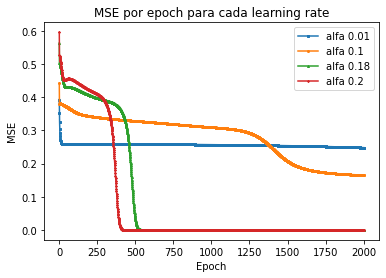

In [29]:
#Se grafica el MSE para cada epoch.
plt.plot(range(1, n_epochs+1), MSE, marker='s',markersize=2,label='alfa 0.01')
plt.plot(range(1, n_epochs_2+1), MSE_2, marker='o',markersize=2,label='alfa 0.1')
plt.plot(range(1, n_epochs_3+1), MSE_3, marker='^',markersize=2,label='alfa 0.18')
plt.plot(range(1, n_epochs_4+1), MSE_4, marker='*',markersize=2,label='alfa 0.2')
plt.legend()
plt.title("MSE por epoch para cada learning rate")
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.show()

Teniendo en cuenta que estas pruebas se realizaron con la misma semilla y con el hiperparámetro epochs=2000 para que sean comparables entre sí:

*   Cuanto mayor es el alfa (learning rate), el MSE comienza de un valor más alto.
*   Cuanto mayor es el alfa (learning rate), en menor cantidad de iteraciones el MSE disminuye abruptamente.

NOTA: un MSE que tiende a cero puede estar indicando overfitting.